## Lecture du CSV et PKL

In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

# 1. On charge les données
df = pd.read_csv('/content/donnees_olympiques_clean_final.csv')

# 2. On charge le modèle
model = joblib.load('/content/modele_jo_2024.pkl')

print("✅ Données et Modèle chargés avec succès !")
df.head()

✅ Données et Modèle chargés avec succès !


,discipline_title,participant_type,country_3_letter_code,games_participations,game_season,game_year,athlete_age,is_host,country_sport_score,athlete_prev_medals,target
0,14,1,100,1,1,2022,23,0,2,1,3
1,14,1,100,2,1,2022,27,0,2,1,3
2,14,1,149,2,1,2022,36,0,4,2,2
3,14,1,149,2,1,2022,32,0,4,2,2
4,14,1,193,1,1,2022,25,0,2,1,1


## Podium par Sport

/tmp/ipython-input-2286559666.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Variable', data=df_imp, palette='viridis')


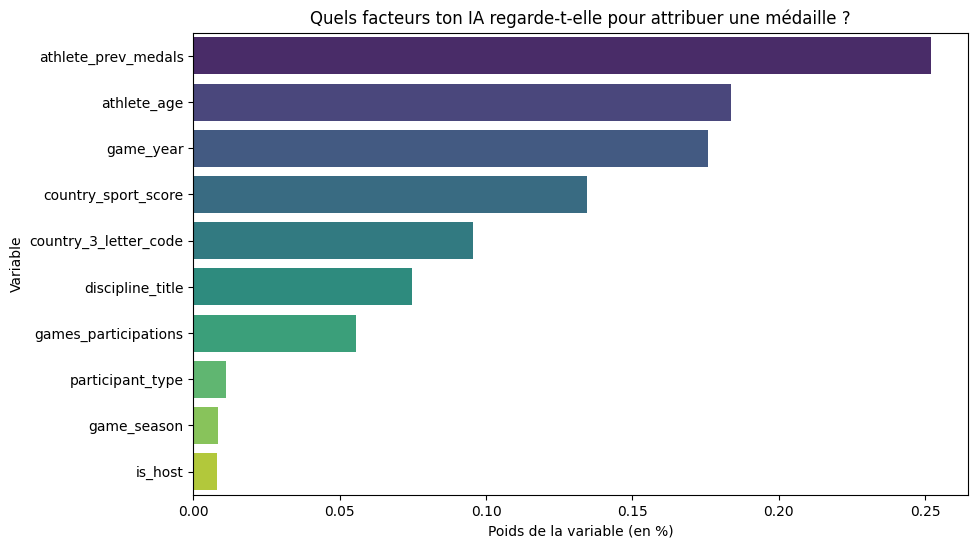

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

X_cols = [c for c in df.columns if c not in ['target', 'Sport']]

# On récupère l'importance des variables stockée dans le modèle
importances = model.feature_importances_

# Création du tableau
df_imp = pd.DataFrame({
    'Variable': X_cols,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Affichage
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Variable', data=df_imp, palette='viridis')
plt.title("Quels facteurs ton IA regarde-t-elle pour attribuer une médaille ?")
plt.xlabel("Poids de la variable (en %)")
plt.show()

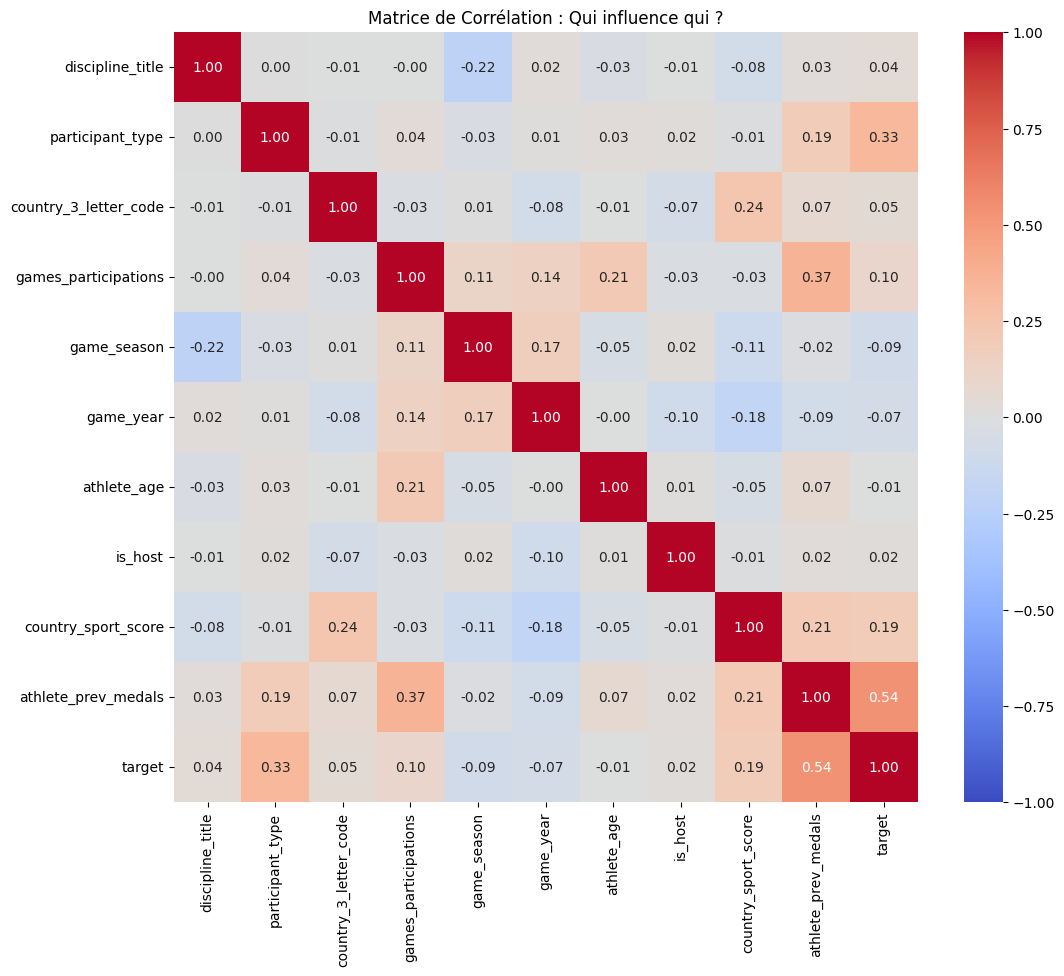

In [ ]:
plt.figure(figsize=(12, 10))

# calcul des corrélations
corr_matrix = df.corr()

# On affiche la carte de chaleur
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Matrice de Corrélation : Qui influence qui ?")
plt.show()

/tmp/ipython-input-3210606675.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='athlete_age', data=df, palette='Set2')


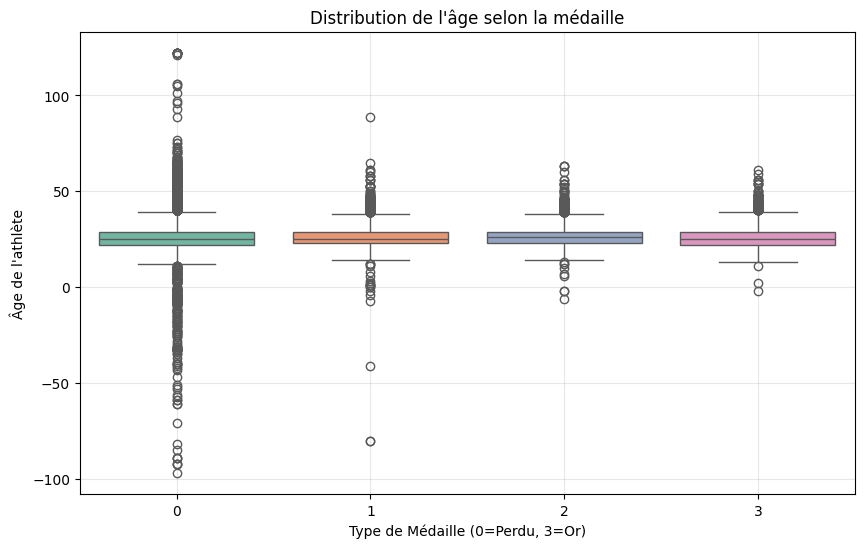

In [ ]:
plt.figure(figsize=(10, 6))

# On crée un boxplot
sns.boxplot(x='target', y='athlete_age', data=df, palette='Set2')

plt.title("Distribution de l'âge selon la médaille")
plt.xlabel("Type de Médaille (0=Perdu, 3=Or)")
plt.ylabel("Âge de l'athlète")
plt.grid(True, alpha=0.3)
plt.show()

/tmp/ipython-input-3660296095.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='games_participations', data=df, palette='magma')


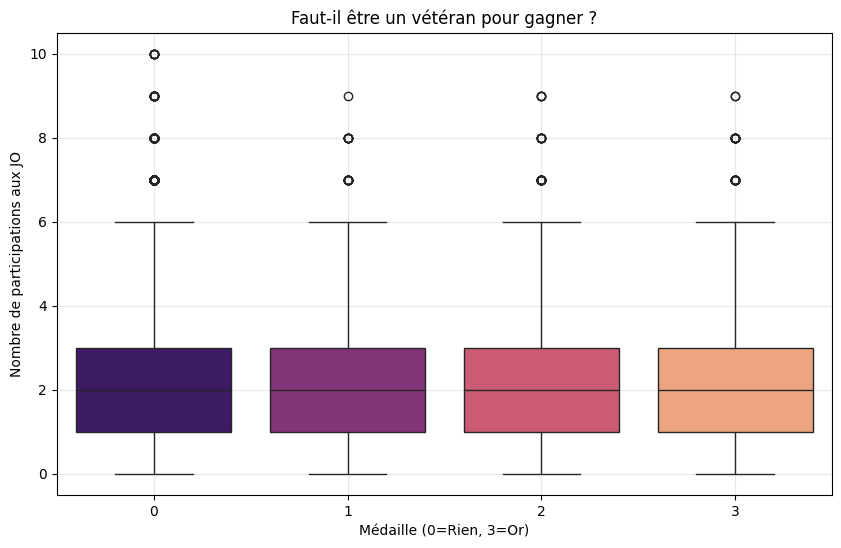

In [ ]:
plt.figure(figsize=(10, 6))

# On regarde si le nombre de participations est plus élevé chez les gagnants
sns.boxplot(x='target', y='games_participations', data=df, palette='magma')

plt.title("Faut-il être un vétéran pour gagner ?")
plt.xlabel("Médaille (0=Rien, 3=Or)")
plt.ylabel("Nombre de participations aux JO")
plt.grid(True, alpha=0.3)
plt.show()

/tmp/ipython-input-2084270738.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y='country_sport_score', data=df, palette='cool')


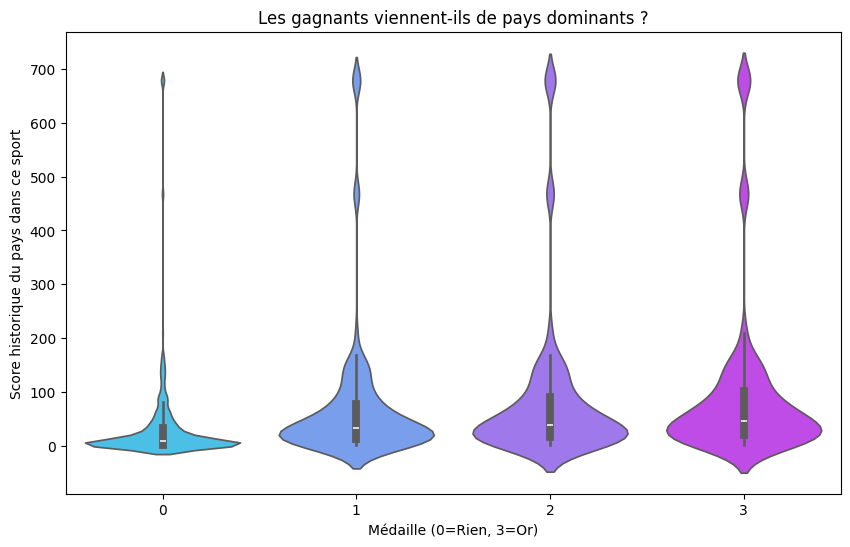

In [ ]:
plt.figure(figsize=(10, 6))

# On visualise le score du pays selon le résultat
sns.violinplot(x='target', y='country_sport_score', data=df, palette='cool')

plt.title("Les gagnants viennent-ils de pays dominants ?")
plt.xlabel("Médaille (0=Rien, 3=Or)")
plt.ylabel("Score historique du pays dans ce sport")
plt.show()

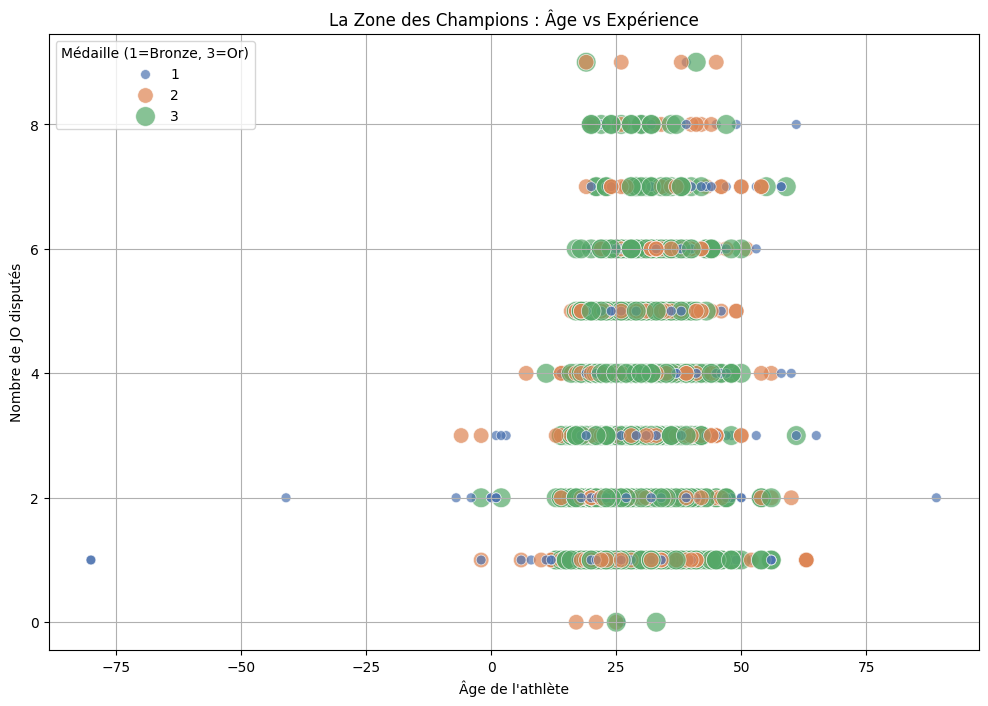

In [ ]:
plt.figure(figsize=(12, 8))

# On filtre
# On affiche les gagnants
df_winners = df[df['target'] > 0]

# On crée un nuage de points
sns.scatterplot(x='athlete_age', y='games_participations',
                hue='target', size='target',
                sizes=(50, 200), palette='deep',
                data=df_winners, alpha=0.7)

plt.title("La Zone des Champions : Âge vs Expérience")
plt.xlabel("Âge de l'athlète")
plt.ylabel("Nombre de JO disputés")
plt.legend(title='Médaille (1=Bronze, 3=Or)')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# On prend la moyenne de chaque colonne
profil_type = df.drop(columns=['target']).mean().to_frame().T
cols_entieres = ['games_participations', 'game_year', 'athlete_age', 'is_host', 'country_sport_score', 'athlete_prev_medals']
profil_type[cols_entieres] = profil_type[cols_entieres].astype(int)

# Création des profils
# --- Le JEUNE
jeune = profil_type.copy()
jeune['athlete_age'] = 20
jeune['games_participations'] = 0
jeune['athlete_prev_medals'] = 0

# --- Le VÉTÉRAN
veteran = profil_type.copy()
veteran['athlete_age'] = 32
veteran['games_participations'] = 3
veteran['athlete_prev_medals'] = 2

# Prédiction par l'IA
proba_jeune = model.predict_proba(jeune)[0]
proba_veteran = model.predict_proba(veteran)[0]

print("🥊 DUEL : JEUNE PRODIGE vs VÉTÉRAN 🥊")
print(f"Probabilité de gagner l'OR pour le Jeune (20 ans) : {proba_jeune[3]:.2%}")
print(f"Probabilité de gagner l'OR pour le Vétéran (32 ans) : {proba_veteran[3]:.2%}")

if proba_veteran[3] > proba_jeune[3]:
    print("🏆 L'IA préfère l'Expérience !")
else:
    print("🏆 L'IA préfère la Jeunesse !")

🥊 DUEL : JEUNE PRODIGE vs VÉTÉRAN 🥊
Probabilité de gagner l'OR pour le Jeune (20 ans) : 2.97%
Probabilité de gagner l'OR pour le Vétéran (32 ans) : 11.40%
🏆 L'IA préfère l'Expérience !


In [ ]:
import pandas as pd
import numpy as np

# 1. On crée un profil "ELITE"
cols_model = model.feature_names_in_
elite_base = df[cols_model].mean().to_frame().T

# On lui donne un profil de compétiteur
elite_base['athlete_age'] = 26
elite_base['games_participations'] = 2
elite_base['athlete_prev_medals'] = 1

# --- Profil Petit Pays
petit_pays = elite_base.copy()
petit_pays['country_sport_score'] = 0

# --- Profil Super-Puissance
gros_pays = elite_base.copy()
gros_pays['country_sport_score'] = df['country_sport_score'].max()

# Calcul des probabilités
p_petit = model.predict_proba(petit_pays)[0]
p_gros = model.predict_proba(gros_pays)[0]

# On calcule la chance d'avoir n'importe quelle médaille
chance_medaille_petit = sum(p_petit[1:])
chance_medaille_gros = sum(p_gros[1:])

print("🏆 DUEL DES CHAMPIONS : L'IMPACT DU DRAPEAU 🏆")
print("-" * 45)
print(f"Chance de médaille (Toutes couleurs) :")
print(f"👉 Pour le Petit Pays      : {chance_medaille_petit:.2%}")
print(f"👉 Pour la Super-Puissance : {chance_medaille_gros:.2%}")

print("-" * 45)
print(f"Détail pour la Super-Puissance :")
print(f"🥇 Or     : {p_gros[3]:.2%}")
print(f"🥈 Argent : {p_gros[2]:.2%}")
print(f"🥉 Bronze : {p_gros[1]:.2%}")

diff = chance_medaille_gros - chance_medaille_petit
print("-" * 45)
print(f"Analyse : Le poids du pays booste les chances de {diff:+.2%}")

🏆 DUEL DES CHAMPIONS : L'IMPACT DU DRAPEAU 🏆
---------------------------------------------
Chance de médaille (Toutes couleurs) :
👉 Pour le Petit Pays      : 5.50%
👉 Pour la Super-Puissance : 56.70%
---------------------------------------------
Détail pour la Super-Puissance :
🥇 Or     : 8.45%
🥈 Argent : 28.03%
🥉 Bronze : 20.21%
---------------------------------------------
Analyse : Le poids du pays booste les chances de +51.20%


In [ ]:
import pandas as pd

# 1. On crée un profil "CHAMPION"
cols_model = model.feature_names_in_
champion_base = df[cols_model].mean().to_frame().T

# On lui donne des stats de médaillable
champion_base['athlete_age'] = 27
champion_base['games_participations'] = 2
champion_base['athlete_prev_medals'] = 1
champion_base['country_sport_score'] = df['country_sport_score'].median()

# --- Cas A : À l'étranger
visiteur = champion_base.copy()
visiteur['is_host'] = 0

# --- Cas B : À domicile
local = champion_base.copy()
local['is_host'] = 1

# 3. Prédiction
p_visiteur = model.predict_proba(visiteur)[0]
p_local = model.predict_proba(local)[0]

# On regarde la chance de médaille totale
chance_visiteur = sum(p_visiteur[1:])
chance_local = sum(p_local[1:])

print("🏠 ANALYSE DE L'EFFET DOMICILE (PROFIL CHAMPION) 🏠")
print("-" * 50)
print(f"Chance de médaille à l'ÉTRANGER : {chance_visiteur:.2%}")
print(f"Chance de médaille à DOMICILE   : {chance_local:.2%}")

gain_total = chance_local - chance_visiteur
print("-" * 50)
print(f"🔥 LE BOOST PARIS 2024 : {gain_total:+.2%} de chances en plus !")

# Détail sur l'Or uniquement
gain_or = p_local[3] - p_visiteur[3]
if gain_or > 0:
    print(f"🥇 Spécifiquement pour l'OR : {gain_or:+.2%}")

🏠 ANALYSE DE L'EFFET DOMICILE (PROFIL CHAMPION) 🏠
--------------------------------------------------
Chance de médaille à l'ÉTRANGER : 28.97%
Chance de médaille à DOMICILE   : 41.59%
--------------------------------------------------
🔥 LE BOOST PARIS 2024 : +12.61% de chances en plus !
🥇 Spécifiquement pour l'OR : +1.50%


In [ ]:
# --- Athlète A : Talentueux mais jamais médaillé
talent = champion_base.copy()
talent['athlete_age'] = 25
talent['games_participations'] = 2
talent['athlete_prev_medals'] = 0

# --- Athlète B : Le Champion en titre
champion_titre = champion_base.copy()
champion_titre['athlete_age'] = 25
champion_titre['games_participations'] = 2
champion_titre['athlete_prev_medals'] = 1

# Prédiction
p_talent = model.predict_proba(talent)[0]
p_titre = model.predict_proba(champion_titre)[0]

print("🥇 LE POIDS DU PALMARÈS 🥇")
print(f"Chance d'Or pour le talent (0 médaille) : {p_talent[3]:.2%}")
print(f"Chance d'Or pour le champion (1 médaille) : {p_titre[3]:.2%}")
print(f"👉 Le 'statut' de médaillé booste les chances d'Or de : {p_titre[3]-p_talent[3]:+.2%}")

🥇 SCÉNARIO A : LE POIDS DU PALMARÈS 🥇
Chance d'Or pour le talent (0 médaille) : 0.00%
Chance d'Or pour le champion (1 médaille) : 11.50%
👉 Le 'statut' de médaillé booste les chances d'Or de : +11.50%


In [ ]:
# On utilise le score historique du sport
score_max = df['country_sport_score'].max()
score_moyen = df['country_sport_score'].mean()

# --- Profil A : Sport où la France est Reine
sport_roi = champion_base.copy()
sport_roi['country_sport_score'] = score_max
sport_roi['is_host'] = 1

# --- Profil B : Sport où la France est Outsider
sport_outsider = champion_base.copy()
sport_outsider['country_sport_score'] = 5
sport_outsider['is_host'] = 1

# Prédiction
p_roi = model.predict_proba(sport_roi)[0]
p_outsider = model.predict_proba(sport_outsider)[0]

print("🥋 SPORT ROI vs SPORT OUTSIDER 🤺")
print(f"Chance de médaille en Sport Dominant : {sum(p_roi[1:]):.2%}")
print(f"Chance de médaille en Sport Outsider : {sum(p_outsider[1:]):.2%}")
print(f"👉 L'expertise nationale pèse : {sum(p_roi[1:])-sum(p_outsider[1:]):+.2%} sur le podium")


🥋 SCÉNARIO B : SPORT ROI vs SPORT OUTSIDER 🤺
Chance de médaille en Sport Dominant : 47.73%
Chance de médaille en Sport Outsider : 33.65%
👉 L'expertise nationale pèse : +14.08% sur le podium


In [ ]:
# --- David : Pays faible, mais à DOMICILE
david_paris = champion_base.copy()
david_paris['country_sport_score'] = 5
david_paris['is_host'] = 1

# --- Goliath : Pays surpuissant, mais à L'EXTÉRIEUR
goliath_visiteur = champion_base.copy()
goliath_visiteur['country_sport_score'] = df['country_sport_score'].max()
goliath_visiteur['is_host'] = 0

# Prédiction
p_david = sum(model.predict_proba(david_paris)[0][1:])
p_goliath = sum(model.predict_proba(goliath_visiteur)[0][1:])

print("🌍 L'EFFET DOMICILE BAT-IL LA PUISSANCE ? 🌍")
print(f"Chance de médaille pour David (Faible + Paris) : {p_david:.2%}")
print(f"Chance de médaille pour Goliath (Fort + Visiteur) : {p_goliath:.2%}")

🌍 SCÉNARIO 4 : L'EFFET DOMICILE BAT-IL LA PUISSANCE ? 🌍
Chance de médaille pour David (Faible + Paris) : 33.65%
Chance de médaille pour Goliath (Fort + Visiteur) : 54.17%


In [ ]:
# --- La Légende
legende = champion_base.copy()
legende['athlete_age'] = 38
legende['games_participations'] = 5
legende['athlete_prev_medals'] = 3
legende['is_host'] = 1

# --- La Jeune Star
jeune_star = champion_base.copy()
jeune_star['athlete_age'] = 26
jeune_star['games_participations'] = 2
jeune_star['athlete_prev_medals'] = 1
jeune_star['is_host'] = 1

p_legende = sum(model.predict_proba(legende)[0][1:])
p_jeune = sum(model.predict_proba(jeune_star)[0][1:])

print("👴 LE VÉTÉRAN vs LA JEUNE STAR 👴")
print(f"Chance de médaille pour la Légende (38 ans) : {p_legende:.2%}")
print(f"Chance de médaille pour la Jeune Star (26 ans) : {p_jeune:.2%}")


👴 SCÉNARIO 5 : LE VÉTÉRAN vs LA JEUNE STAR 👴
Chance de médaille pour la Légende (38 ans) : 44.17%
Chance de médaille pour la Jeune Star (26 ans) : 46.09%


In [ ]:
# --- Le profil ultime
super_favori = champion_base.copy()
super_favori['athlete_age'] = 26
super_favori['is_host'] = 1
super_favori['athlete_prev_medals'] = 3
super_favori['country_sport_score'] = df['country_sport_score'].max()
super_favori['games_participations'] = 3

p_ultime = model.predict_proba(super_favori)[0]

print("🚀 LE SCORE DU SUPER-FAVORI 🚀")
print(f"Probabilité d'Or 🥇 : {p_ultime[3]:.2%}")
print(f"Probabilité d'Argent 🥈 : {p_ultime[2]:.2%}")
print(f"Probabilité de Bronze 🥉 : {p_ultime[1]:.2%}")
print(f"TOTAL podium : {sum(p_ultime[1:]):.2%}")


🚀 SCÉNARIO 6 : LE SCORE DU SUPER-FAVORI 🚀
Probabilité d'Or 🥇 : 31.42%
Probabilité d'Argent 🥈 : 26.07%
Probabilité de Bronze 🥉 : 17.31%
TOTAL podium : 74.80%
